In [36]:
import os
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt

In [37]:
def read_pend_agent_output(fn):
    actor_loss = []
    critic1_loss = []
    critic2_loss = []
    for line in open(fn):
        data = line.split()
        actor_loss.append(float(data[0]))
        critic1_loss.append(float(data[1]))
        critic2_loss.append(float(data[2]))
    return actor_loss, critic1_loss, critic2_loss

In [38]:
def read_pend_env_output(fn):
    action = []
    reward = []
    state_0 = []
    state_1 = []
    state_2 = []
    for line in open(fn):
        data = line.split()
        action.append(float(data[0]))
        reward.append(float(data[1]))
        state_0.append(float(data[2]))
        state_1.append(float(data[3]))
        state_2.append(float(data[4]))
    return action, reward, state_0, state_1, state_2

In [39]:
fn = 'runs/18_08_2023_13-07-52_Pendulum_baseline_logging_50_200_agent'
a_loss, c1_loss, c2_loss = read_pend_agent_output(fn)

In [40]:
fn_env = 'runs/18_08_2023_13-07-52_Pendulum_baseline_logging_50_200_env'
action, reward, state_0, state_1, state_2 = read_pend_env_output(fn_env)

In [71]:
# avg_action = np.mean(np.array(action).reshape(-1, 200), axis=1)
avg_loss = np.mean(np.array(a_loss).reshape(-1, 200), axis=1)
avg_reward = np.mean(np.array(reward).reshape(-1, 200), axis=1)
# avg_state_0 = np.mean(np.array(state_0).reshape(-1, 200), axis=1)
# avg_state_1 = np.mean(np.array(state_1).reshape(-1, 200), axis=1)
# avg_state_2 = np.mean(np.array(state_2).reshape(-1, 200), axis=1)

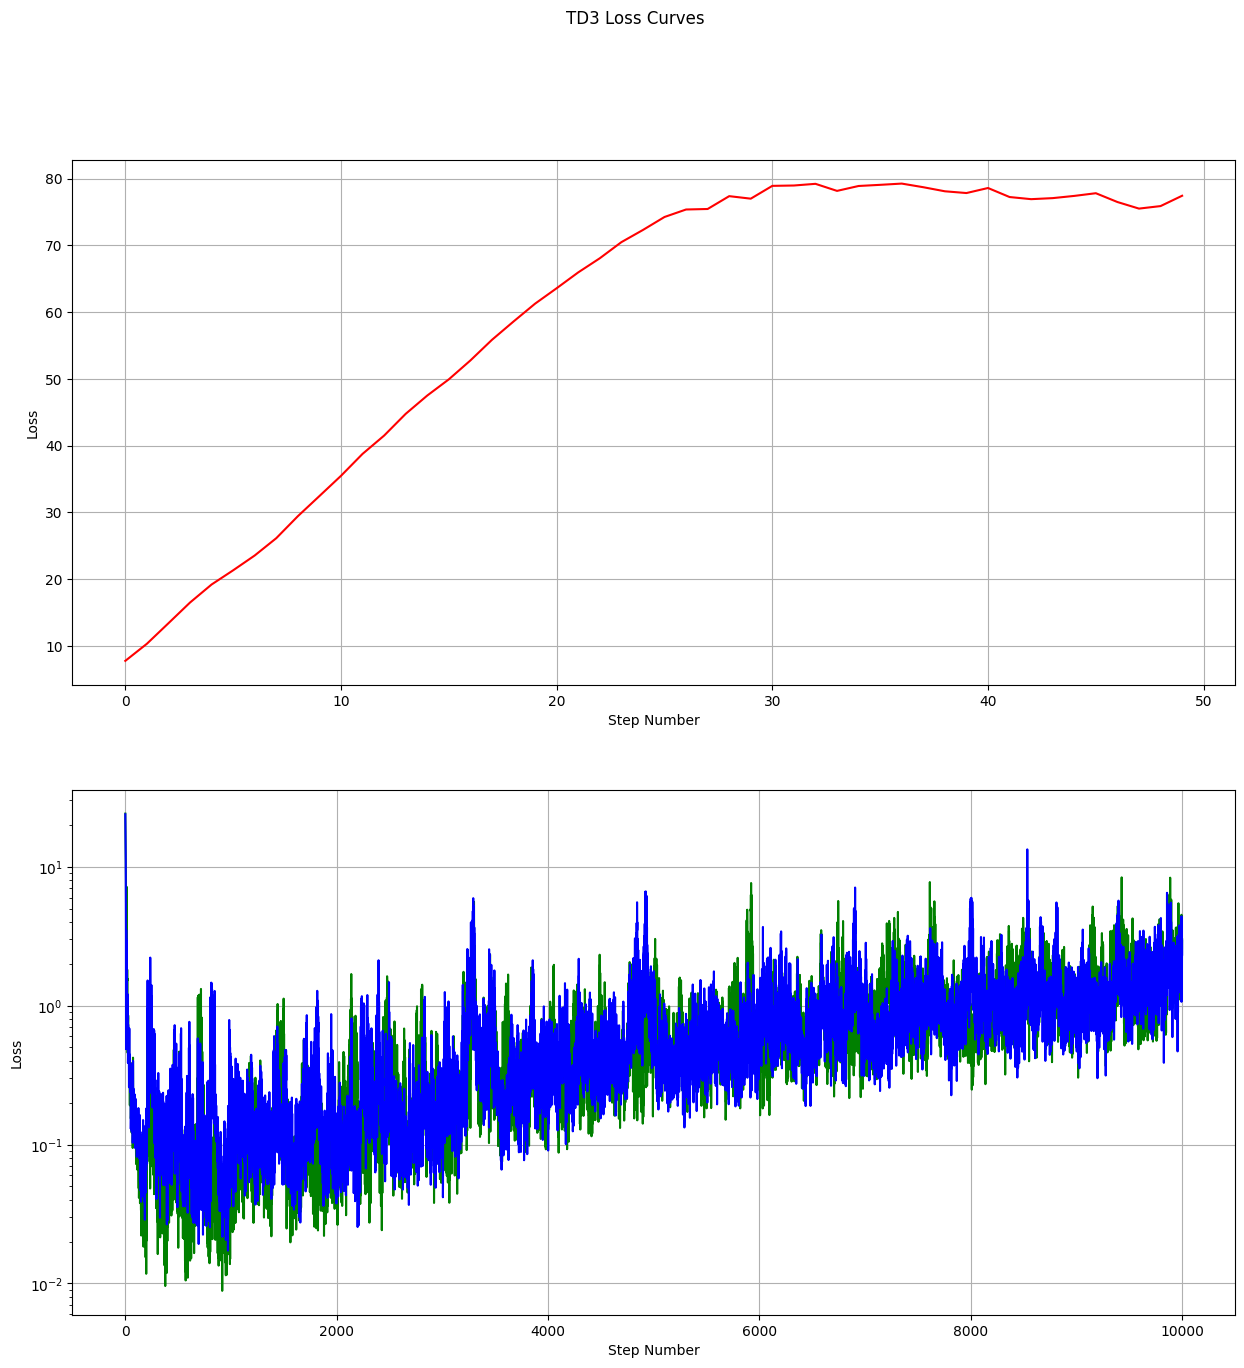

In [74]:
fig, axs = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].plot(avg_loss, 'r')
axs[1].plot(c1_loss, 'g', c2_loss, 'b')
axs[1].set_yscale("log")
axs[0].grid()
axs[1].grid()
fig.suptitle("TD3 Loss Curves")
for ax in axs.flat:
    ax.set(xlabel="Step Number", ylabel="Loss")

Text(0.5, 0.98, 'TD3 Environmental Data')

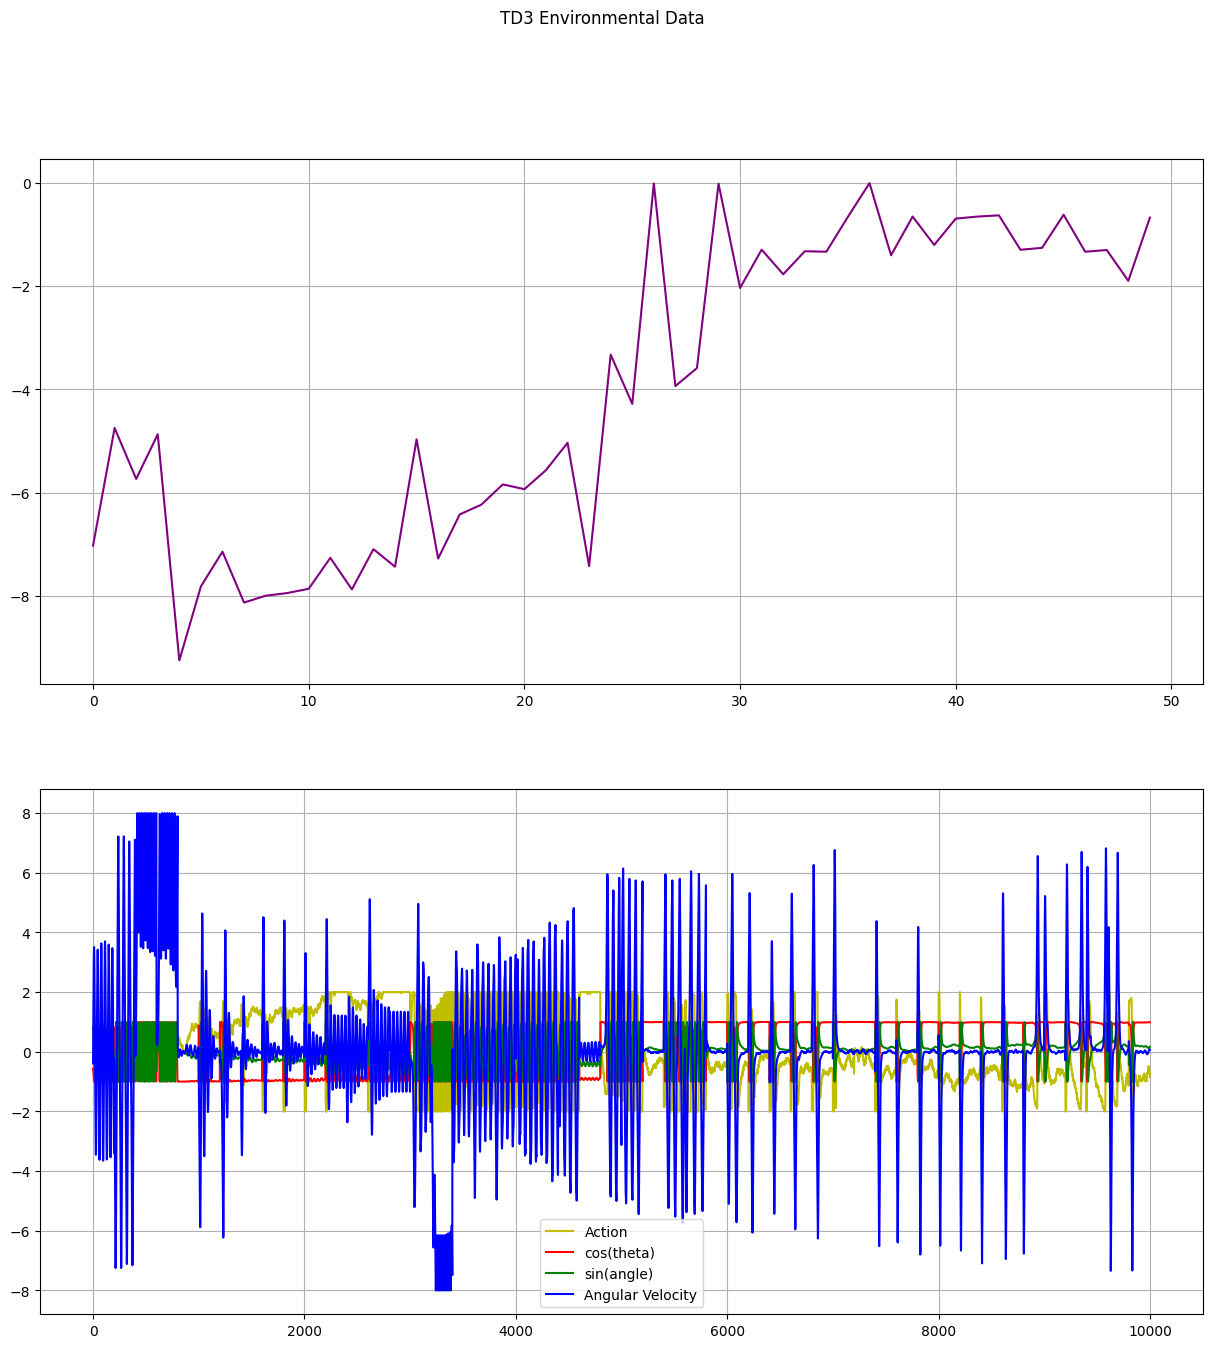

In [66]:
fig, axs = plt.subplots(2)
axs[0].plot(avg_reward, 'purple')
axs[1].plot(action, 'y', state_0, 'r', state_1, 'g', state_2, 'b')
axs[1].legend(['Action','cos(theta)','sin(angle)', 'Angular Velocity'])
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].grid()
axs[1].grid()
fig.suptitle("TD3 Environmental Data")
# for ax in axs.flat:
#     ax.set(xlabel="Step Number", ylabel="Loss")